# Proyek Analisis Data: [bike sharing dataset]
- **Nama:** Daniel Matheus Anggi Saputra Giay
- **Email:** daniel.giay@student.i3l.ac.id
- **ID Dicoding:** giay_learner

## Menentukan Pertanyaan Bisnis

- di bulan berapa jumlah pengguna rental sepeda paling banyak dan paling sedikit ?
- bagaimana peningkatan jumlah sepeda yang berhasil dirental pada saat hari kerja dan hari libur ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- there are 16 features in day_df, each row represent 1 day

In [3]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- there are 17 features in hour_df, most are still the same features as day_df except the "hr" which represent the 1 hour for each row

### Assessing Data

for day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


no missing value, the data looks normal

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


no duplication, the statistical parameter looks good

for hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


no missing value

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- dteday need to be in Dtype of datetime
- year and month should be converted to actual value
- no duplication
- no missing value
- temperature, humidity, and windspeed are not in common standart, it need to be converted into the actual temperature

### Cleaning Data

for day_df

change the temperature, humidity, and windspeed to actual value, based on the information provided in the readme file, the value can be multiplied by a number provided (41 for temp, 50 for atemp, 100 for hum, and 67 for windspeed).
the date dataype of column "dteday" also should be changed from object to datetime  

In [10]:
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

In [11]:
print(day_df[['temp', 'atemp', 'hum', 'windspeed']].head())

        temp     atemp      hum  windspeed
0  14.110847  18.18125  80.5833  10.749882
1  14.902598  17.68695  69.6087  16.652113
2   8.050924   9.47025  43.7273  16.636703
3   8.200000  10.60610  59.0435  10.739832
4   9.305237  11.46350  43.6957  12.522300


convert the datatype to 'datetime'

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

convert years to actual value

In [13]:
day_df['yr'] = day_df['yr'].map({0: 2011, 1: 2012})

convert month to actual value

In [14]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'
    })

convert workingday to actual value  

In [15]:
day_df['workingday'] = day_df['workingday'].map({0: 'holiday/weekend', 1: 'working'})

for hour_df

the same thing from above (day_df) is also implemented for hour_df

In [16]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

In [17]:
print(hour_df[['temp', 'atemp', 'hum', 'windspeed']].head())

   temp   atemp   hum  windspeed
0  9.84  14.395  81.0        0.0
1  9.02  13.635  80.0        0.0
2  9.02  13.635  80.0        0.0
3  9.84  14.395  75.0        0.0
4  9.84  14.395  75.0        0.0


In [18]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [19]:
hour_df['yr'] = hour_df['yr'].map({0: 2011, 1: 2012})

In [20]:
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'
    })

In [21]:
hour_df['workingday'] = hour_df['workingday'].map({0: 'holiday/weekend', 1: 'working'})

**Insight:**
- temperature, humidity, and wind speed has been converted to actual value
- year, month, and workingday has been converted to actual value
- datetime datatype for dteday has been set
- both table is now clean

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,may,NaN,NaN,NaN,working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1488,NaN,NaN,NaN,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,2011.502561,NaN,11.546752,0.028770,3.003683,NaN,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,2011.000000,NaN,6.000000,0.000000,1.000000,NaN,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,2012.000000,NaN,12.000000,0.000000,3.000000,NaN,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,2012.000000,NaN,18.000000,0.000000,5.000000,NaN,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,2012.000000,NaN,23.000000,1.000000,6.000000,NaN,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [23]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,january,NaN,NaN,working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,62,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,NaN,0.028728,2.997264,NaN,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,NaN,0.000000,0.000000,NaN,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,NaN,0.000000,1.000000,NaN,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,NaN,0.000000,3.000000,NaN,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,NaN,0.000000,5.000000,NaN,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,NaN,1.000000,6.000000,NaN,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [24]:
day_df.groupby(by='season').agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean"]
})

cnt       temp                      
            sum        max        min       mean
season                                          
1        471348  23.472500   2.424346  12.207650
2        918589  33.141653  10.374763  22.320611
3       1061129  35.328347  19.235847  28.958682
4        841613  26.957500   9.054153  17.339148

**Insight:**
- season 3 (light snow, light rain) has the most total rental bikes
- season 3 has highest average of temperature (28.9 C)
- season 1 (few clouds) has the fewest total rental bikes
- season 1 has lowest average of temperature

In [25]:
day_df.groupby(by='mnth').agg({
    "temp": "mean",
    "cnt": 'sum'
}).sort_values(by="cnt", ascending=False)

,temp,cnt
mnth,,
august,29.051844,351194
june,28.047985,346342
september,25.275884,345991
july,30.974287,344948
may,24.386735,331686
october,19.885500,322352
april,19.269952,269094
november,15.138010,254831
march,16.012089,228920


**Insight:**
- from May until October, it has higher bike users (above 320.000 users)
- from may until october, the average of temperature is higher (above 19.5 C)

In [26]:
day_df.groupby(by='yr').agg({
    "temp": "mean",
    "atemp": "mean",
    "cnt": 'sum'
}).sort_values(by="cnt", ascending=False)

,temp,atemp,cnt
yr,,,
2012,20.667313,24.092605,2049576
2011,19.953263,23.341767,1243103


**Insight:**
- in 2012, the average temperature is increasing
- in 2012, number of bike users is higher

In [27]:
day_df.groupby(by='workingday').agg({
    "casual": "sum",
    "registered": 'sum',
    "cnt": 'sum'
})

,casual,registered,cnt
workingday,,,
holiday/weekend,316732,683537,1000269
working,303285,1989125,2292410


**Insight:**
- the number of bikes users is bigger on the working day, and majority of them are registered user

In [28]:
day_df.groupby(by=["workingday", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

casual  registered     cnt
workingday      season                            
working         3       118746      630327  749073
                2        97829      532784  630613
                4        58488      520571  579059
                1        28222      305443  333665
holiday/weekend 3       107345      204711  312056
                2       105693      182283  287976
                4        71294      191260  262554
                1        32400      105283  137683

**Insight:**
- we have the highest number of bike users during work days in season 3 (light snow, light rain)
- we have the lowest number of bike users during holidays/weekend in season 1 (few clouds)

now, to see the average hour for each rental bikes per day, both day_df and hour_df should be merged

In [29]:
hour_df_accumulation = hour_df.groupby('dteday', as_index=False).agg({
    'hr': 'mean'
})
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df_accumulation,
    how="left",
    on="dteday",
)

In [30]:
# day_hour_df.groupby(by=['workingday']).agg({
#     #"registered": "sum",
#     "hr": 'mean',
#     "cnt": "max"
# }).sort_values(by="hr", ascending=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:di bulan berapa jumlah pengguna rental sepeda paling banyak dan paling sedikit ?

<ipython-input-31-56b24fd3674d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users_2011 = day_hour_df[day_hour_df['yr'] == 2011].resample(rule='M', on='dteday').agg({
<ipython-input-31-56b24fd3674d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users_2012 = day_hour_df[day_hour_df['yr'] == 2012].resample(rule='M', on='dteday').agg({


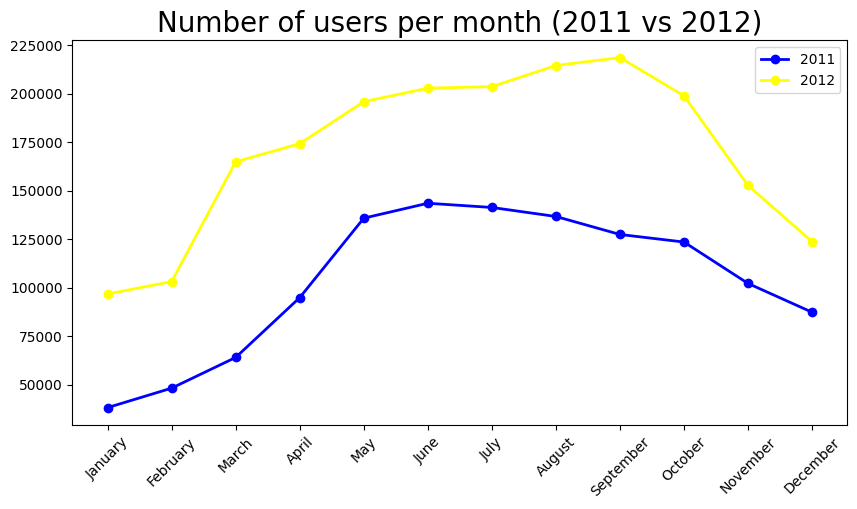

In [31]:
monthly_users_2011 = day_hour_df[day_hour_df['yr'] == 2011].resample(rule='M', on='dteday').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt" : "sum"
})
monthly_users_2012 = day_hour_df[day_hour_df['yr'] == 2012].resample(rule='M', on='dteday').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt" : "sum"
})
monthly_users_2011.index = monthly_users_2011.index.strftime('%B')
monthly_users_2011 = monthly_users_2011.reset_index()

monthly_users_2012.index = monthly_users_2012.index.strftime('%B')
monthly_users_2012 = monthly_users_2012.reset_index()

monthly_users_2011.rename(columns={'dteday':'date'}, inplace=True)
monthly_users_2012.rename(columns={'dteday':'date'}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_users_2011["date"], monthly_users_2011["cnt"], label='2011', marker='o', linewidth=2, color='blue')
plt.plot(monthly_users_2012["date"], monthly_users_2012["cnt"], label='2012', marker='o', linewidth=2, color='yellow')

plt.title("Number of users per month (2011 vs 2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

to see the graph for each month, the years (2011 and 2012) should be in separated dataframe. and then for the datetime index of 'dteday' need to be display as an actual month for readeble purpose

**Insight:**
- The number of registered bike users is higher from may-august, but lower in november-march
- the average number of registered bike users is higher in 2012 than in 2011

### Pertanyaan 2: bagaimana peningkatan jumlah sepeda yang berhasil dirental pada saat hari kerja dan hari libur ?   

<ipython-input-32-a7a72014d4a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


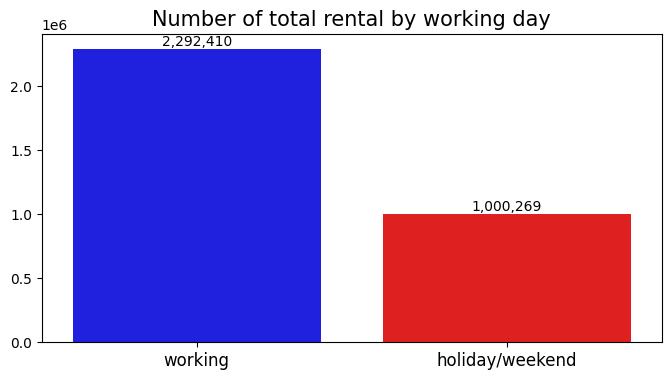

In [32]:
workingday_df = day_hour_df.groupby(by="workingday").cnt.sum().reset_index()
workingday_df.rename(columns={
    "workingday": "working_day",
    "cnt": "total_rental"
}, inplace=True)

plt.figure(figsize=(8, 4))

sns.barplot(
    y="total_rental",
    x="working_day",
    data=workingday_df.sort_values(by="total_rental", ascending=False),
    palette= ["blue", "red"]
)
for index, value in enumerate(workingday_df.sort_values(by="total_rental", ascending=False)['total_rental']):
    plt.text(index, value, f'{value:,}', ha='center', va='bottom', fontsize=10)

plt.title("Number of total rental by working day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- in the working day (no holiday/weekend) the number of bikes users is higher than during holiday/weekend

In [33]:
day_hour_df.to_csv("day_hour_data.csv", index=False)

## Conclusion

- (pertanyaan 1) pada tahun 2012, terjadi peningkatan jumlah pengguna rental sepeda dan secara significant berada pada angka terbanyak sepanjang periode bulan mei sampai agustus, dan mengalami penurunan pada bulan november sampai maret. trend yang sama juga terjadi pada tahun 2011, namun dengan angka rata rata yang lebih rendah dibanding dengan tahun 2012.  
- (pertanyaan 2) sepanjang tahun 2011 sampai 2012, lebih banyak pengguna rental sepeda ketika hari kerja yaitu sebanyak 2,29 juta pengguna, sedangkan pada hari libur hanya 1 juta pengguna.  